In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Ukraine_vs_Russia_twitter.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1588348206014169088,1588346792634159110,2022-11-04 01:51:37 UTC,2022-11-04,01:51:37,0,987897537397960704,airidajovaraus1,Airida Jovarauskaite,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BBCNews', 'name': 'BBC News ...",NaN,NaN,NaN,NaN
1,1588348205418569728,1588262415354863616,2022-11-04 01:51:36 UTC,2022-11-04,01:51:36,0,1565122296268091392,mhpaouvmlhy7,@,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'n4hpg', 'name': 'Bill Crowel...",NaN,NaN,NaN,NaN
2,1588348203908632578,1587489893441310721,2022-11-04 01:51:36 UTC,2022-11-04,01:51:36,0,1534469956116652032,jim_linley,Jim Linley,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SamRamani2', 'name': 'Samuel...",NaN,NaN,NaN,NaN
3,1588348203832705025,1588247237263765504,2022-11-04 01:51:36 UTC,2022-11-04,01:51:36,0,1521245825694900226,rodrigoo_alvesx,Rodrigo Alves,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NaielyPazian', 'name': '🇧🇷 N...",NaN,NaN,NaN,NaN
4,1588348200553152512,1588310073109106688,2022-11-04 01:51:35 UTC,2022-11-04,01:51:35,0,1586551432572030977,langel42178668,Ronald Lange,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'VeggiesMaster', 'name': 'Mic...",NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10005 non-null  int64  
 1   conversation_id  10005 non-null  int64  
 2   created_at       10005 non-null  object 
 3   date             10005 non-null  object 
 4   time             10005 non-null  object 
 5   timezone         10005 non-null  int64  
 6   user_id          10005 non-null  int64  
 7   username         10005 non-null  object 
 8   name             10004 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10005 non-null  object 
 11  language         10005 non-null  object 
 12  mentions         10005 non-null  object 
 13  urls             10005 non-null  object 
 14  photos           10005 non-null  object 
 15  replies_count    10005 non-null  int64  
 16  retweets_count   10005 non-null  int64  
 17  likes_count 

In [4]:
data = data[["username", "tweet", "language"]]
data.head()

,username,tweet,language
0,airidajovaraus1,@BBCNews Don't think so any terrorist from Russia,en
1,mhpaouvmlhy7,@n4hpg And I sit here thinking Russia is a Chr...,en
2,jim_linley,@SamRamani2 Russia has spent a few trillion ov...,en
3,rodrigoo_alvesx,@NaielyPazian @LeoMaranhao22 Vazaram um coisa ...,pt
4,langel42178668,@VeggiesMaster @happycrazytown @FoxNews I’m go...,en


In [5]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


In [7]:
data["tweet"] = data["tweet"].apply(clean)
data["tweet"].head()

0                   bbcnew dont think terrorist russia
1     sit think russia christian nation ukrain bunc...
2     russia spent trillion past sever decad much h...
3    naielypazian  vazaram um coisa só não posso co...
4    veggiesmast happycrazytown foxnew i'm go go li...
Name: tweet, dtype: object

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

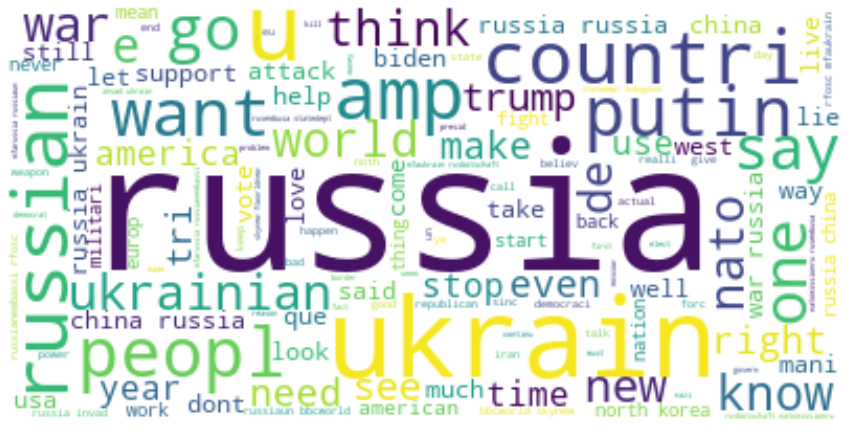

In [9]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()